This script reads the Nc file for Mosart Discharge downloaded from Casper log-in

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Where to save the figures
PROJECT_ROOT_DIR = "."  

outputPath2Create = r'C:/rezaul/1.academic/1.research/2.project/mrb/output/'
 
if not os.path.exists(outputPath2Create):
    os.makedirs(outputPath2Create)    
    
path2Save = 'C:/rezaul/1.academic/1.research/2.project/mrb/output/fig/paperOne/figures/'

if not os.path.exists(path2Save):
    os.makedirs(path2Save)    

IMAGES_PATH = os.path.join(path2Save)
outputPath = os.path.join(outputPath2Create)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=600):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


## Import Libraries

## for USGS

In [2]:
from dataretrieval import nwis
from IPython.display import display

## Regular usage

In [3]:
# Common imports
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
#from osgeo import gdal # Import the GDAL library
#import gdal

import cmocean

#import matplotlib.pyplot as plt # Import the Matplotlib package
from matplotlib import pyplot as plt  # Import the Matplotlib package
from numpy import linspace # Import the Linspace numpy library
from numpy import meshgrid # Import the Meshgrid numpy library

#from init import *
import scipy.io as sio
# Common imports
import calendar
import datetime
import matplotlib.dates as mdates
from numpy import array, ma
#import scipy.io
from scipy.io import loadmat   # https://scipy-cookbook.readthedocs.io/items/Reading_mat_files.html
import xarray as xr


In [4]:
# Stats
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import gamma, norm
from scipy.signal import detrend

from netCDF4 import Dataset   # http://code.google.com/p/netcdf4-python/
from numpy.random import normal
from numpy import hstack

import math


In [5]:
# Plotting
import matplotlib.colors as colors
from copy import copy
import matplotlib.cm as cm
#from matplotlib_scalebar.scalebar import ScaleBar

import seaborn as sns
import matplotlib.gridspec as gridspec


In [6]:
# Projection
import cartopy.crs as ccrs

import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
from descartes import PolygonPatch
import shapefile as shp  # Requires the pyshp package

#from cartopy.feature import ShapelyFeature
#from cartopy.io.shapereader import Reader

In [7]:
import warnings

## Read Lat, Lon, and discharge data from CESM2 processed from "GLADE" in Casper of NCAR HPC

### Lat

In [8]:
#file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/latsUsArr.npy'
file_LatUs = 'https://github.com/rezaulg/CESM2-projection-Mississippi-discharge/blob/main/latsUsArr.npy'

lats_US = np.load(file_LatUs)
print(lats_US.shape)
print(lats_US)

(60,)
[24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75 30.25
 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75 36.25
 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75 42.25
 42.75 43.25 43.75 44.25 44.75 45.25 45.75 46.25 46.75 47.25 47.75 48.25
 48.75 49.25 49.75 50.25 50.75 51.25 51.75 52.25 52.75 53.25 53.75 54.25]


### Lon

In [9]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/lonsUsArr.npy'
lons_US = np.load(file_LonUs)
print(lons_US.shape)
print(lons_US)

(140,)
[-130.25 -129.75 -129.25 -128.75 -128.25 -127.75 -127.25 -126.75 -126.25
 -125.75 -125.25 -124.75 -124.25 -123.75 -123.25 -122.75 -122.25 -121.75
 -121.25 -120.75 -120.25 -119.75 -119.25 -118.75 -118.25 -117.75 -117.25
 -116.75 -116.25 -115.75 -115.25 -114.75 -114.25 -113.75 -113.25 -112.75
 -112.25 -111.75 -111.25 -110.75 -110.25 -109.75 -109.25 -108.75 -108.25
 -107.75 -107.25 -106.75 -106.25 -105.75 -105.25 -104.75 -104.25 -103.75
 -103.25 -102.75 -102.25 -101.75 -101.25 -100.75 -100.25  -99.75  -99.25
  -98.75  -98.25  -97.75  -97.25  -96.75  -96.25  -95.75  -95.25  -94.75
  -94.25  -93.75  -93.25  -92.75  -92.25  -91.75  -91.25  -90.75  -90.25
  -89.75  -89.25  -88.75  -88.25  -87.75  -87.25  -86.75  -86.25  -85.75
  -85.25  -84.75  -84.25  -83.75  -83.25  -82.75  -82.25  -81.75  -81.25
  -80.75  -80.25  -79.75  -79.25  -78.75  -78.25  -77.75  -77.25  -76.75
  -76.25  -75.75  -75.25  -74.75  -74.25  -73.75  -73.25  -72.75  -72.25
  -71.75  -71.25  -70.75  -70.25  -69.75  -6

### Historical data

In [10]:
file_histSel_Us_ensMem = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsHistSelEnsMembers.npy'
file_histSel_Us_ensMem_loaded = np.load(file_histSel_Us_ensMem)
print(file_histSel_Us_ensMem_loaded.shape)
maxVal = np.nanmax(file_histSel_Us_ensMem_loaded)
maxVal

(1020, 60, 140, 50)


1e+36

### Scenatio data

In [11]:
file_scen_Us_ensMem = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsScenEnsMems.npy'
file_scen_Us_ensMem_loaded = np.load(file_scen_Us_ensMem)
print(file_scen_Us_ensMem_loaded.shape)
maxVal = np.nanmax(file_scen_Us_ensMem_loaded)
maxVal

(1032, 60, 140, 50)


1e+36

## Concatenate the historical and scenario data arrays

In [12]:
disch_histSel_scen_Us_ensMems = np.concatenate((file_histSel_Us_ensMem_loaded, file_scen_Us_ensMem_loaded), axis=0)
print(disch_histSel_scen_Us_ensMems.shape)

(2052, 60, 140, 50)


In [13]:
ens_size = disch_histSel_scen_Us_ensMems.shape[3]
print(ens_size)

50


## Coordinates at the outlet of the basins

In [14]:
# Missouri at Hermann
latTrgt_MissouriHermann = 38.71
lonTrgt_MissouriHermann = -91.44

# Arkansas at Murray Dam near Little Rock
latTrgt_ArkansasMurrayLittleRock = 34.79
lonTrgt_ArkansasMurrayLittleRock = -92.36

# Ohio at Olmsted
latTrgt_OhioOlmsted = 37.18
lonTrgt_OhioOlmsted = -89.06

# Mississippi at Vicksburg
latTrgt_MissiVicks = 32.32
lonTrgt_MissiVicks = -90.91


In [15]:
# Missouri at Hermann
latTrgtIndex_MissouriHermann = np.argmin( np.abs(lats_US - latTrgt_MissouriHermann))
lonTrgtIndex_MissouriHermann = np.argmin( np.abs(lons_US - lonTrgt_MissouriHermann))
print(latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann)

# Arkansas at Murray Dam near Little Rock
latTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lats_US - latTrgt_ArkansasMurrayLittleRock))
lonTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lons_US - lonTrgt_ArkansasMurrayLittleRock))
print(latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock)

# Ohio at Olmsted
latTrgtIndex_OhioOlmsted = np.argmin( np.abs(lats_US - latTrgt_OhioOlmsted))
lonTrgtIndex_OhioOlmsted = np.argmin( np.abs(lons_US - lonTrgt_OhioOlmsted))
print(latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted)

# Mississippi at Vicksburg
latTrgtIndex_MissiVicks = np.argmin( np.abs(lats_US - latTrgt_MissiVicks))
lonTrgtIndex_MissiVicks = np.argmin( np.abs(lons_US - lonTrgt_MissiVicks))
print(latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks)


28 78
20 76
25 82
15 79


## Extracting discharge values at different outlet points

In [16]:
disch_histSel_scen_ensMems_MissouriHermann = disch_histSel_scen_Us_ensMems[:, latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann, :]
print(disch_histSel_scen_ensMems_MissouriHermann.shape)

disch_histSel_scen_ensMems_ArkansasMurrayLittleRock = disch_histSel_scen_Us_ensMems[:, latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock, :]
print(disch_histSel_scen_ensMems_ArkansasMurrayLittleRock.shape)

disch_histSel_scen_ensMems_OhioOlmsted = disch_histSel_scen_Us_ensMems[:, latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted, :]
print(disch_histSel_scen_ensMems_OhioOlmsted.shape)

disch_histSel_scen_ensMems_MissiVicks = disch_histSel_scen_Us_ensMems[:, latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks, :]
print(disch_histSel_scen_ensMems_MissiVicks.shape)


(2052, 50)
(2052, 50)
(2052, 50)
(2052, 50)


## Subsetting the data into different periods / Eras

### The four time (1971-2000, 2015-2044, 2045-2074, and 2075-2100) slots

In [17]:
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100

In [18]:
nYrsHistSelScen = scenYrEnd - histYrSelSt + 1
print(nYrsHistSelScen)

nMonsPerYr = 12     
print(nMonsPerYr)

171
12


### Reference Period

In [19]:
refPeriodStepSt = (refPeriodYrSt - histYrSelSt)*nMonsPerYr

refPeriodStepEnd = (refPeriodYrEnd - histYrSelSt + 1)*nMonsPerYr
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

492 852
360


### Era 1

In [20]:
scenEraOneStepSt = (scenYrSt - histYrSelSt)*nMonsPerYr
scenEraOneStepEnd = (scenEraTwoYrSt - histYrSelSt)*nMonsPerYr

print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

1020 1380
360


### Era 2

In [21]:
scenEraTwoStepSt = (scenEraTwoYrSt - histYrSelSt)*nMonsPerYr
scenEraTwoStepEnd = (scenEraThreeYrSt - histYrSelSt)*nMonsPerYr

print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

1380 1740
360


### Era 3

In [22]:
scenEraThreeStepSt = (scenEraThreeYrSt - histYrSelSt)*12
scenEraThreeStepEnd = (scenYrEnd - histYrSelSt + 1)*12

print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

1740 2052
312


### Missouri at Hermann

In [23]:
disch_refPeriod_mems_MissouriHermann = disch_histSel_scen_ensMems_MissouriHermann[refPeriodStepSt:refPeriodStepEnd, :]
print(disch_refPeriod_mems_MissouriHermann.shape)

disch_scenEraOne_mems_MissouriHermann = disch_histSel_scen_ensMems_MissouriHermann[scenEraOneStepSt:scenEraOneStepEnd, :]
print(disch_scenEraOne_mems_MissouriHermann.shape)

disch_scenEraTwo_mems_MissouriHermann = disch_histSel_scen_ensMems_MissouriHermann[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(disch_scenEraTwo_mems_MissouriHermann.shape)

disch_scenEraThree_mems_MissouriHermann = disch_histSel_scen_ensMems_MissouriHermann[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(disch_scenEraThree_mems_MissouriHermann.shape)


(360, 50)
(360, 50)
(360, 50)
(312, 50)


### Arkansas at Murray Dam near Little Rock

In [24]:
disch_refPeriod_mems_ArkansasMurrayLittleRock = disch_histSel_scen_ensMems_ArkansasMurrayLittleRock[refPeriodStepSt:refPeriodStepEnd, :]
print(disch_refPeriod_mems_ArkansasMurrayLittleRock.shape)

disch_scenEraOne_mems_ArkansasMurrayLittleRock = disch_histSel_scen_ensMems_ArkansasMurrayLittleRock[scenEraOneStepSt:scenEraOneStepEnd, :]
print(disch_scenEraOne_mems_ArkansasMurrayLittleRock.shape)

disch_scenEraTwo_mems_ArkansasMurrayLittleRock = disch_histSel_scen_ensMems_ArkansasMurrayLittleRock[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(disch_scenEraTwo_mems_ArkansasMurrayLittleRock.shape)

disch_scenEraThree_mems_ArkansasMurrayLittleRock = disch_histSel_scen_ensMems_ArkansasMurrayLittleRock[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(disch_scenEraThree_mems_ArkansasMurrayLittleRock.shape)


(360, 50)
(360, 50)
(360, 50)
(312, 50)


### Ohio at Olmsted

In [25]:
disch_refPeriod_mems_OhioOlmsted = disch_histSel_scen_ensMems_OhioOlmsted[refPeriodStepSt:refPeriodStepEnd, :]
print(disch_refPeriod_mems_OhioOlmsted.shape)

disch_scenEraOne_mems_OhioOlmsted = disch_histSel_scen_ensMems_OhioOlmsted[scenEraOneStepSt:scenEraOneStepEnd, :]
print(disch_scenEraOne_mems_OhioOlmsted.shape)

disch_scenEraTwo_mems_OhioOlmsted = disch_histSel_scen_ensMems_OhioOlmsted[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(disch_scenEraTwo_mems_OhioOlmsted.shape)

disch_scenEraThree_mems_OhioOlmsted = disch_histSel_scen_ensMems_OhioOlmsted[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(disch_scenEraThree_mems_OhioOlmsted.shape)



(360, 50)
(360, 50)
(360, 50)
(312, 50)


### Mississippi at Vicksburg

In [26]:
disch_refPeriod_mems_MissiVicks = disch_histSel_scen_ensMems_MissiVicks[refPeriodStepSt:refPeriodStepEnd, :]
print(disch_refPeriod_mems_MissiVicks.shape)

disch_scenEraOne_mems_MissiVicks = disch_histSel_scen_ensMems_MissiVicks[scenEraOneStepSt:scenEraOneStepEnd, :]
print(disch_scenEraOne_mems_MissiVicks.shape)

disch_scenEraTwo_mems_MissiVicks = disch_histSel_scen_ensMems_MissiVicks[scenEraTwoStepSt:scenEraTwoStepEnd, :]
print(disch_scenEraTwo_mems_MissiVicks.shape)

disch_scenEraThree_mems_MissiVicks = disch_histSel_scen_ensMems_MissiVicks[scenEraThreeStepSt:scenEraThreeStepEnd, :]
print(disch_scenEraThree_mems_MissiVicks.shape)



(360, 50)
(360, 50)
(360, 50)
(312, 50)


## Ensemble Mean for stations

### Missouri at Hermann

In [27]:
disch_refPeriod_ensMean_MissouriHermann = np.nanmean(disch_refPeriod_mems_MissouriHermann, axis = 1)
print(disch_refPeriod_ensMean_MissouriHermann.shape)

disch_scenEraOne_ensMean_MissouriHermann = np.nanmean(disch_scenEraOne_mems_MissouriHermann, axis = 1)
print(disch_scenEraOne_ensMean_MissouriHermann.shape)

disch_scenEraTwo_ensMean_MissouriHermann = np.nanmean(disch_scenEraTwo_mems_MissouriHermann, axis = 1)
print(disch_scenEraTwo_ensMean_MissouriHermann.shape)

disch_scenEraThree_ensMean_MissouriHermann = np.nanmean(disch_scenEraThree_mems_MissouriHermann, axis = 1)
print(disch_scenEraThree_ensMean_MissouriHermann.shape)


(360,)
(360,)
(360,)
(312,)


### Arkansas at Murray Dam near Little Rock

In [28]:
disch_refPeriod_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_refPeriod_mems_ArkansasMurrayLittleRock, axis = 1)
print(disch_refPeriod_ensMean_ArkansasMurrayLittleRock.shape)

disch_scenEraOne_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_scenEraOne_mems_ArkansasMurrayLittleRock, axis = 1)
print(disch_scenEraOne_ensMean_ArkansasMurrayLittleRock.shape)

disch_scenEraTwo_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_scenEraTwo_mems_ArkansasMurrayLittleRock, axis = 1)
print(disch_scenEraTwo_ensMean_ArkansasMurrayLittleRock.shape)

disch_scenEraThree_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_scenEraThree_mems_ArkansasMurrayLittleRock, axis = 1)
print(disch_scenEraThree_ensMean_ArkansasMurrayLittleRock.shape)


(360,)
(360,)
(360,)
(312,)


### Ohio at Olmsted

In [29]:
disch_refPeriod_ensMean_OhioOlmsted = np.nanmean(disch_refPeriod_mems_OhioOlmsted, axis = 1)
print(disch_refPeriod_ensMean_OhioOlmsted.shape)

disch_scenEraOne_ensMean_OhioOlmsted = np.nanmean(disch_scenEraOne_mems_OhioOlmsted, axis = 1)
print(disch_scenEraOne_ensMean_OhioOlmsted.shape)

disch_scenEraTwo_ensMean_OhioOlmsted = np.nanmean(disch_scenEraTwo_mems_OhioOlmsted, axis = 1)
print(disch_scenEraTwo_ensMean_OhioOlmsted.shape)

disch_scenEraThree_ensMean_OhioOlmsted = np.nanmean(disch_scenEraThree_mems_OhioOlmsted, axis = 1)
print(disch_scenEraThree_ensMean_OhioOlmsted.shape)


(360,)
(360,)
(360,)
(312,)


### Mississippi River at Vicksburg

In [30]:
disch_refPeriod_ensMean_MissiVicks = np.nanmean(disch_refPeriod_mems_MissiVicks, axis = 1)
print(disch_refPeriod_ensMean_MissiVicks.shape)

disch_scenEraOne_ensMean_MissiVicks = np.nanmean(disch_scenEraOne_mems_MissiVicks, axis = 1)
print(disch_scenEraOne_ensMean_MissiVicks.shape)

disch_scenEraTwo_ensMean_MissiVicks = np.nanmean(disch_scenEraTwo_mems_MissiVicks, axis = 1)
print(disch_scenEraTwo_ensMean_MissiVicks.shape)

disch_scenEraThree_ensMean_MissiVicks = np.nanmean(disch_scenEraThree_mems_MissiVicks, axis = 1)
print(disch_scenEraThree_ensMean_MissiVicks.shape)


(360,)
(360,)
(360,)
(312,)


## Discharge Statistics (mean and stdev) for Ensemble Mean of Historical Reference Period

### Missouri

In [31]:
disch_refPeriodMean_ensMean_MissouriHermann = np.nanmean(disch_refPeriod_ensMean_MissouriHermann)
print(disch_refPeriodMean_ensMean_MissouriHermann)

disch_refPeriodStd_ensMean_MissouriHermann = np.nanstd(disch_refPeriod_ensMean_MissouriHermann)
print(disch_refPeriodStd_ensMean_MissouriHermann)

4269.254595404185
1367.0712508312927


### Arkansas

In [32]:
disch_refPeriodMean_ensMean_ArkansasMurrayLittleRock = np.nanmean(disch_refPeriod_ensMean_ArkansasMurrayLittleRock)
print(disch_refPeriodMean_ensMean_ArkansasMurrayLittleRock)

disch_refPeriodStd_ensMean_ArkansasMurrayLittleRock = np.nanstd(disch_refPeriod_ensMean_ArkansasMurrayLittleRock)
print(disch_refPeriodStd_ensMean_ArkansasMurrayLittleRock)

1798.0349709062727
466.70740069042


### Ohio at Olmsted

In [33]:
disch_refPeriodMean_ensMean_OhioOlmsted = np.nanmean(disch_refPeriod_ensMean_OhioOlmsted)
print(disch_refPeriodMean_ensMean_OhioOlmsted)

disch_refPeriodStd_ensMean_OhioOlmsted = np.nanstd(disch_refPeriod_ensMean_OhioOlmsted)
print(disch_refPeriodStd_ensMean_OhioOlmsted)

7890.239422232167
2172.8832232156274


### Mississippi at Vicksburg

In [34]:
disch_refPeriodMean_ensMean_MissiVicks = np.nanmean(disch_refPeriod_ensMean_MissiVicks)
print(disch_refPeriodMean_ensMean_MissiVicks)

disch_refPeriodStd_ensMean_MissiVicks = np.nanstd(disch_refPeriod_ensMean_MissiVicks)
print(disch_refPeriodStd_ensMean_MissiVicks)

22716.041475665006
6258.326570579285


## Calculate Z-score (Ensemble Mean of the members)

### Missouri

In [35]:
    
disch_scenEraOne_zScore_ensMean_MissouriHermann = (disch_scenEraOne_ensMean_MissouriHermann - disch_refPeriodMean_ensMean_MissouriHermann)/disch_refPeriodStd_ensMean_MissouriHermann        
disch_scenEraTwo_zScore_ensMean_MissouriHermann = (disch_scenEraTwo_ensMean_MissouriHermann - disch_refPeriodMean_ensMean_MissouriHermann)/disch_refPeriodStd_ensMean_MissouriHermann        
disch_scenEraThree_zScore_ensMean_MissouriHermann = (disch_scenEraThree_ensMean_MissouriHermann - disch_refPeriodMean_ensMean_MissouriHermann)/disch_refPeriodStd_ensMean_MissouriHermann        
    
print(disch_scenEraOne_zScore_ensMean_MissouriHermann.shape)
print(disch_scenEraTwo_zScore_ensMean_MissouriHermann.shape)
print(disch_scenEraThree_zScore_ensMean_MissouriHermann.shape)


(360,)
(360,)
(312,)


### Arkansas

In [36]:
    
disch_scenEraOne_zScore_ensMean_ArkansasMurrayLittleRock = (disch_scenEraOne_ensMean_ArkansasMurrayLittleRock - disch_refPeriodMean_ensMean_ArkansasMurrayLittleRock)/disch_refPeriodStd_ensMean_ArkansasMurrayLittleRock        
disch_scenEraTwo_zScore_ensMean_ArkansasMurrayLittleRock = (disch_scenEraTwo_ensMean_ArkansasMurrayLittleRock - disch_refPeriodMean_ensMean_ArkansasMurrayLittleRock)/disch_refPeriodStd_ensMean_ArkansasMurrayLittleRock        
disch_scenEraThree_zScore_ensMean_ArkansasMurrayLittleRock = (disch_scenEraThree_ensMean_ArkansasMurrayLittleRock - disch_refPeriodMean_ensMean_ArkansasMurrayLittleRock)/disch_refPeriodStd_ensMean_ArkansasMurrayLittleRock        
    
print(disch_scenEraOne_zScore_ensMean_ArkansasMurrayLittleRock.shape)
print(disch_scenEraTwo_zScore_ensMean_ArkansasMurrayLittleRock.shape)
print(disch_scenEraThree_zScore_ensMean_ArkansasMurrayLittleRock.shape)


(360,)
(360,)
(312,)


### Ohio at Olmsted

In [37]:
    
disch_scenEraOne_zScore_ensMean_OhioOlmsted = (disch_scenEraOne_ensMean_OhioOlmsted - disch_refPeriodMean_ensMean_OhioOlmsted)/disch_refPeriodStd_ensMean_OhioOlmsted        
disch_scenEraTwo_zScore_ensMean_OhioOlmsted = (disch_scenEraTwo_ensMean_OhioOlmsted - disch_refPeriodMean_ensMean_OhioOlmsted)/disch_refPeriodStd_ensMean_OhioOlmsted        
disch_scenEraThree_zScore_ensMean_OhioOlmsted = (disch_scenEraThree_ensMean_OhioOlmsted - disch_refPeriodMean_ensMean_OhioOlmsted)/disch_refPeriodStd_ensMean_OhioOlmsted        
    
print(disch_scenEraOne_zScore_ensMean_OhioOlmsted.shape)
print(disch_scenEraTwo_zScore_ensMean_OhioOlmsted.shape)
print(disch_scenEraThree_zScore_ensMean_OhioOlmsted.shape)


(360,)
(360,)
(312,)


### Mississippi at Vicksburg

In [38]:
    
disch_scenEraOne_zScore_ensMean_MissiVicks = (disch_scenEraOne_ensMean_MissiVicks - disch_refPeriodMean_ensMean_MissiVicks)/disch_refPeriodStd_ensMean_MissiVicks        
disch_scenEraTwo_zScore_ensMean_MissiVicks = (disch_scenEraTwo_ensMean_MissiVicks - disch_refPeriodMean_ensMean_MissiVicks)/disch_refPeriodStd_ensMean_MissiVicks        
disch_scenEraThree_zScore_ensMean_MissiVicks = (disch_scenEraThree_ensMean_MissiVicks - disch_refPeriodMean_ensMean_MissiVicks)/disch_refPeriodStd_ensMean_MissiVicks        
    
print(disch_scenEraOne_zScore_ensMean_MissiVicks.shape)
print(disch_scenEraTwo_zScore_ensMean_MissiVicks.shape)
print(disch_scenEraThree_zScore_ensMean_MissiVicks.shape)


(360,)
(360,)
(312,)


## Group plot for the Relative Discharges (the Z-score)

C:\Users\muham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\muham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\muham\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

Saving figure fig2


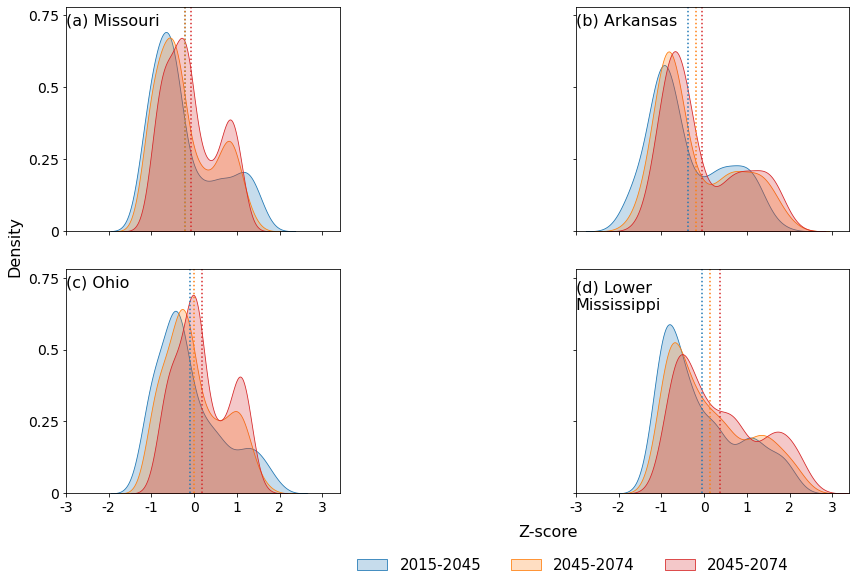

In [39]:
#%matplotlib notebook

tickFontSize = 14
textFontSize = 16
legendFontSize = 15
titleFontSize = 16


linewidth = 0.8
dashLinewidth = 0.7

densityTicks = [0, 0.25, 0.5, 0.75]
densityTicksLebels = ['0', '0.25', '0.5', '0.75']

dischTicks = [-3, -2, -1, 0, 1, 2, 3]
dischTickLebels = ['-3','-2', '-1', '0', '1', '2', '3']

yLow = 0
yHigh = 0.78

xLow = -3.00
xHigh = 3.4

#+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

fig = plt.figure(figsize=(12, 8), constrained_layout=False)

axs = [plt.subplot(2, 2, x + 1,) for x in range(4)]
ax1 = axs[0]

sns.distplot(disch_scenEraOne_zScore_ensMean_MissouriHermann, color='tab:blue', hist=False, kde = True, rug=False,ax=ax1, 
             kde_kws = {'shade': True, 'linewidth': linewidth}, label="2015-2045")
ax1.axvline(x=np.nanmean(disch_scenEraOne_zScore_ensMean_MissouriHermann), ls=':', color='tab:blue')

sns.distplot(disch_scenEraTwo_zScore_ensMean_MissouriHermann, color='tab:orange', hist=False, kde = True, rug=False,ax=ax1,
             kde_kws = {'shade': True, 'linewidth': linewidth}, label="2045-2074")
ax1.axvline(x=np.nanmean(disch_scenEraTwo_zScore_ensMean_MissouriHermann), ls=':', color='tab:orange')

sns.distplot(disch_scenEraThree_zScore_ensMean_MissouriHermann, color='tab:red', hist=False, kde = True, rug=False,ax=ax1,
             kde_kws = {'shade': True, 'linewidth': linewidth}, rug_kws={"color": "r", "alpha": 0.3, "linewidth": 2, "height":0.05},
             label="2045-2074")
ax1.axvline(x=np.nanmean(disch_scenEraThree_zScore_ensMean_MissouriHermann), ls=':', color='tab:red')

ax1.set_title('(a) Missouri', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax1.legend('', frameon=False,fontsize='large')
ax1.set_ylim([yLow, yHigh])
ax1.set_xlim([xLow, xHigh])

ax1.set_yticks(densityTicks )
ax1.set_yticklabels(densityTicksLebels, fontsize=tickFontSize)
ax1.set_xticks(dischTicks)
ax1.set_xticklabels('', fontsize=tickFontSize)

ax1.set_ylabel('', fontsize = textFontSize)
ax1.set_xlabel('', fontsize = textFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax2 = axs[1]

sns.distplot(disch_scenEraOne_zScore_ensMean_ArkansasMurrayLittleRock, color='tab:blue', hist=False, kde = True, rug=False,ax=ax2, 
             kde_kws = {'shade': True, 'linewidth': linewidth}, label="2015-2045")
ax2.axvline(x=np.nanmean(disch_scenEraOne_zScore_ensMean_ArkansasMurrayLittleRock), ls=':', color='tab:blue')

sns.distplot(disch_scenEraTwo_zScore_ensMean_ArkansasMurrayLittleRock, color='tab:orange', hist=False, kde = True, rug=False,ax=ax2,
             kde_kws = {'shade': True, 'linewidth': linewidth}, label="2045-2074")
ax2.axvline(x=np.nanmean(disch_scenEraTwo_zScore_ensMean_ArkansasMurrayLittleRock), ls=':', color='tab:orange')

sns.distplot(disch_scenEraThree_zScore_ensMean_ArkansasMurrayLittleRock, color='tab:red', hist=False, kde = True, rug=False,ax=ax2,
             kde_kws = {'shade': True, 'linewidth': linewidth}, rug_kws={"color": "r", "alpha": 0.3, "linewidth": 2, "height":0.05},
             label="2045-2074")
ax2.axvline(x=np.nanmean(disch_scenEraThree_zScore_ensMean_ArkansasMurrayLittleRock), ls=':', color='tab:red')

ax2.set_title('(b) Arkansas', y=0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax2.legend('', frameon=False,fontsize='large')
ax2.set_ylim([yLow, yHigh])
ax2.set_xlim([xLow, xHigh])


ax2.set_yticks(densityTicks)
ax2.set_yticklabels('', fontsize=tickFontSize)

ax2.set_xticks(dischTicks)
ax2.set_xticklabels('', fontsize=tickFontSize)
ax2.set_ylabel('', fontsize = textFontSize)
ax2.set_xlabel('', fontsize = textFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

ax3 = axs[2]
sns.distplot(disch_scenEraOne_zScore_ensMean_OhioOlmsted, color='tab:blue', hist=False, kde = True, rug=False,ax=ax3, 
             kde_kws = {'shade': True, 'linewidth': linewidth}, label="2015-2045")
ax3.axvline(x=np.nanmean(disch_scenEraOne_zScore_ensMean_OhioOlmsted), ls=':', color='tab:blue')
sns.distplot(disch_scenEraTwo_zScore_ensMean_OhioOlmsted, color='tab:orange', hist=False, kde = True, rug=False,ax=ax3,
             kde_kws = {'shade': True, 'linewidth': linewidth}, label="2045-2074")
ax3.axvline(x=np.nanmean(disch_scenEraTwo_zScore_ensMean_OhioOlmsted), ls=':', color='tab:orange')
sns.distplot(disch_scenEraThree_zScore_ensMean_OhioOlmsted, color='tab:red', hist=False, kde = True, rug=False,ax=ax3,
             kde_kws = {'shade': True, 'linewidth': linewidth}, rug_kws={"color": "r", "alpha": 0.3, "linewidth": 2, "height":0.05},
             label="2045-2074")
ax3.axvline(x=np.nanmean(disch_scenEraThree_zScore_ensMean_OhioOlmsted), ls=':', color='tab:red')
ax3.set_title('(c) Ohio', y=0.98, pad=-14, fontsize =  titleFontSize, loc='left')
ax3.legend('', frameon=False,fontsize='large')
ax3.set_ylim([yLow, yHigh])
ax3.set_xlim([xLow, xHigh])

ax3.set_xticks(dischTicks)
ax3.set_xticklabels(dischTickLebels, fontsize=tickFontSize)
ax3.set_yticks(densityTicks)
ax3.set_yticklabels(densityTicksLebels, fontsize=tickFontSize)

ax3.set_ylabel('Density', fontsize = textFontSize)
ax3.yaxis.set_label_coords(-0.16, +1.10)
ax3.set_xlabel('', fontsize = textFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax4 = axs[3]
sns.distplot(disch_scenEraOne_zScore_ensMean_MissiVicks,color='tab:blue', hist=False, kde = True, rug=False,ax=ax4, 
             kde_kws = {'shade': True, 'linewidth': linewidth}, label="2015-2045")
ax4.axvline(x=np.nanmean(disch_scenEraOne_zScore_ensMean_MissiVicks), ls=':', color='tab:blue')
sns.distplot(disch_scenEraTwo_zScore_ensMean_MissiVicks,color='tab:orange', hist=False, kde = True, rug=False,ax=ax4,
             kde_kws = {'shade': True, 'linewidth': linewidth}, label="2045-2074")
ax4.axvline(x=np.nanmean(disch_scenEraTwo_zScore_ensMean_MissiVicks), ls=':', color='tab:orange')
sns.distplot(disch_scenEraThree_zScore_ensMean_MissiVicks,color='tab:red', hist=False, kde = True, rug=False,ax=ax4,
             kde_kws = {'shade': True, 'linewidth': linewidth}, rug_kws={"color": "r", "alpha": 0.3, "linewidth": 2, "height":0.05},
             label="2045-2074")
ax4.axvline(x=np.nanmean(disch_scenEraThree_zScore_ensMean_MissiVicks), ls=':', color='tab:red')
ax4.set_title('(d) Lower\nMississippi', y=0.88, pad=-14, fontsize = titleFontSize, loc='left')

ax4.legend('', frameon=False,fontsize='large')
ax4.set_ylim([yLow, yHigh])
ax4.set_xlim([xLow, xHigh])

ax4.set_yticks(densityTicks)
ax4.set_yticklabels('', fontsize=tickFontSize)

ax4.set_xticks(dischTicks)
ax4.set_xticklabels(dischTickLebels, fontsize=tickFontSize)
ax4.set_ylabel('', fontsize = textFontSize)
ax4.set_xlabel('Z-score', fontsize = textFontSize)
ax4.xaxis.set_label_coords(-0.10, -0.14)
ax4.legend(ncol=3, loc=(-0.82, -0.38),frameon=False, fontsize=legendFontSize)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

plt.subplots_adjust(left = 0.2, wspace=0.2, bottom=0.2)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)


#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\figures\fig2.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\figures\fig2.png', dpi=600)  


plt.show()
